In [1]:
# Cell 1: Import libraries and load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Boston Housing dataset from URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Features (X) and Target (y)
X = data.drop('medv', axis=1)   # all columns except 'medv'
y = data['medv']                # target column


In [2]:
# Display first 5 rows of the dataset
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (506, 13)
Target shape: (506,)


In [4]:
from sklearn.model_selection import train_test_split

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (404, 13)
Test data shape: (102, 13)


In [5]:
# Initialize Linear Regression model
model = LinearRegression()

# Fit model on training data
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred_train=model.predict(X_train)
# Predict house prices on test data
y_pred_test = model.predict(X_test)

# Display first 10 predictions
y_pred_test[:10]


array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597])

In [7]:
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("===== Scikit-Learn Implementation =====")
print("Train MSE:", mse_train)
print("Train R² :", r2_train)
print("Test MSE :", mse_test)
print("Test R²  :", r2_test)


===== Scikit-Learn Implementation =====
Train MSE: 21.641412753226312
Train R² : 0.7508856358979673
Test MSE : 24.291119474973538
Test R²  : 0.6687594935356317


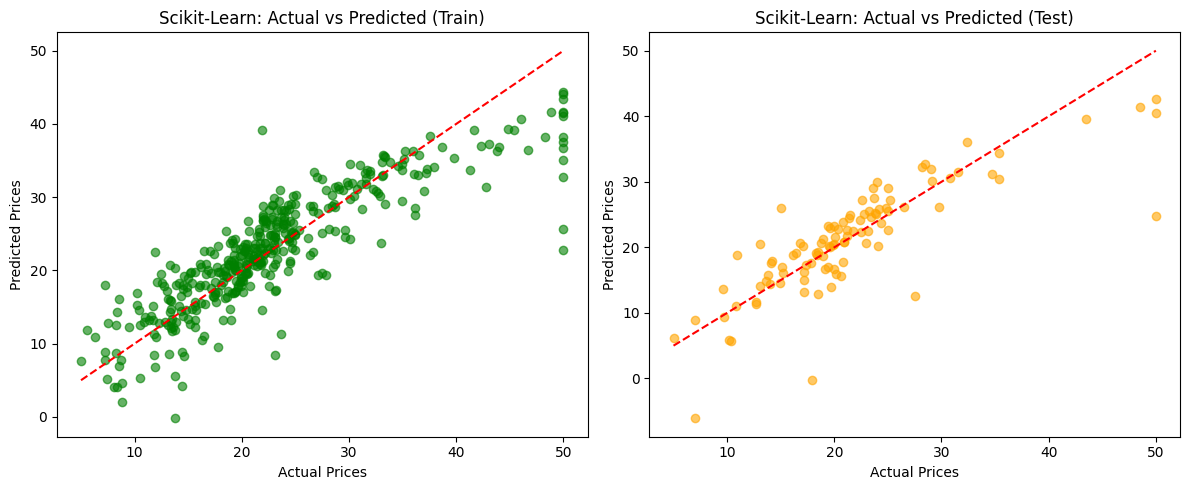

In [8]:
plt.figure(figsize=(12,5))

# Train
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color="green")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title("Scikit-Learn: Actual vs Predicted (Train)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

# Test
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.6, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Scikit-Learn: Actual vs Predicted (Test)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.tight_layout()
plt.savefig("actual_vs_predicted.png", dpi=300)
plt.show()


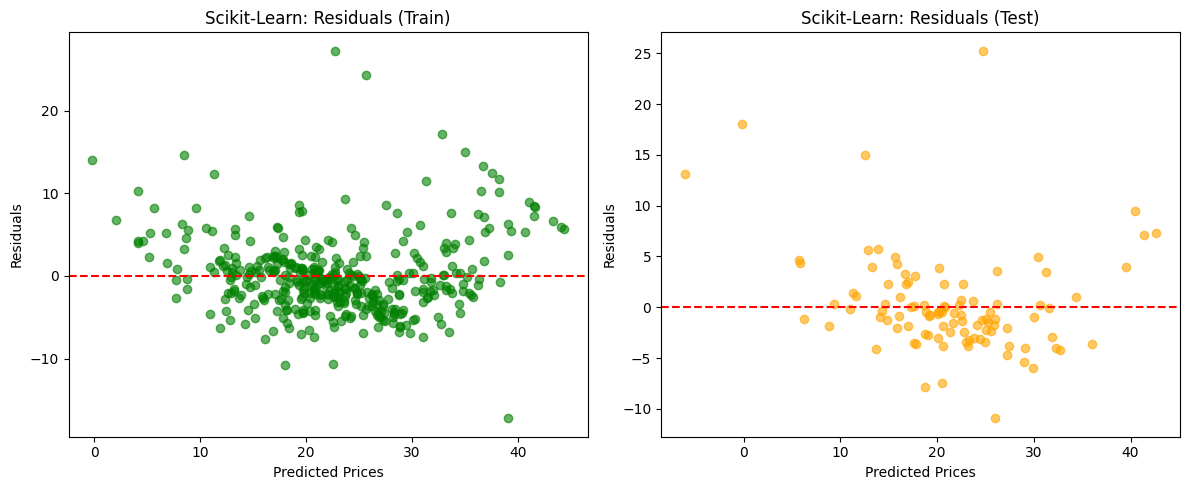

In [9]:
plt.figure(figsize=(12,5))

# Train Residuals
residuals_train = y_train - y_pred_train
plt.subplot(1,2,1)
plt.scatter(y_pred_train, residuals_train, alpha=0.6, color="green")
plt.axhline(0, color="red", linestyle="--")
plt.title("Scikit-Learn: Residuals (Train)")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")

# Test Residuals
residuals_test = y_test - y_pred_test
plt.subplot(1,2,2)
plt.scatter(y_pred_test, residuals_test, alpha=0.6, color="orange")
plt.axhline(0, color="red", linestyle="--")
plt.title("Scikit-Learn: Residuals (Test)")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")

plt.tight_layout()
plt.savefig("residuals.png", dpi=300)
plt.show()


In [10]:
# Print the regression equation (Scikit-Learn)
features = data.drop("medv", axis=1).columns

equation = "y = "
for i in range(len(model.coef_)):
    equation += f"({model.coef_[i]:.4f} * {features[i]}) + "
equation += f"{model.intercept_:.4f}"

print("===== Scikit-Learn Regression Equation =====")
print(equation)


===== Scikit-Learn Regression Equation =====
y = (-0.1131 * crim) + (0.0301 * zn) + (0.0404 * indus) + (2.7844 * chas) + (-17.2026 * nox) + (4.4388 * rm) + (-0.0063 * age) + (-1.4479 * dis) + (0.2624 * rad) + (-0.0106 * tax) + (-0.9155 * ptratio) + (0.0124 * b) + (-0.5086 * lstat) + 30.2468
